In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- import dataset



In [149]:
df = pd.read_csv('02 - CVP.csv')
df.sample(10)

,country,date,Total Vaccinations,Daily Vaccinations,People Vaccinated 100,Daily Vaccination 1 mio,Vaccines
361,Costa Rica,2021-01-24,0.0,2510.0,0.00,493.0,Pfizer/BioNTech
1571,Saudi Arabia,2021-01-20,0.0,14594.0,0.00,419.0,Pfizer/BioNTech
1891,Turkey,2021-01-29,1928351.0,103734.0,0.00,1230.0,Sinovac
471,Denmark,2021-01-01,38117.0,6295.0,0.66,1087.0,"Moderna, Pfizer/BioNTech"
888,Ireland,2021-01-14,0.0,9452.0,0.00,1914.0,Pfizer/BioNTech
1879,Turkey,2021-01-17,706451.0,176613.0,0.00,2094.0,Sinovac
1695,Singapore,2021-01-24,0.0,6874.0,0.00,1175.0,Pfizer/BioNTech
525,England,2020-12-27,835475.0,37897.0,1.48,673.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1097,Lithuania,2021-01-23,67936.0,2449.0,2.16,900.0,"Moderna, Pfizer/BioNTech"
1359,Norway,2021-01-11,23332.0,3023.0,0.43,558.0,Pfizer/BioNTech


- The final dataset required to show all the information

In [151]:
df = df[['country', 'date', 'Total Vaccinations', 'Daily Vaccinations', 'People Vaccinated 100','Daily Vaccination 1 mio', 'Vaccines']]
df.sample(5)

,country,date,Total Vaccinations,Daily Vaccinations,People Vaccinated 100,Daily Vaccination 1 mio,Vaccines
1852,Switzerland,2021-01-09,0.0,3000.0,0.00,347.0,"Moderna, Pfizer/BioNTech"
1663,Seychelles,2021-01-11,0.0,500.0,0.00,5084.0,"Oxford/AstraZeneca, Sinopharm"
485,Denmark,2021-01-15,165457.0,7083.0,2.86,1223.0,"Moderna, Pfizer/BioNTech"
1139,Luxembourg,2021-01-30,0.0,622.0,0.00,994.0,Pfizer/BioNTech
1270,Netherlands,2021-01-20,100000.0,7571.0,0.00,442.0,"Moderna, Pfizer/BioNTech"


# Exploratory Data Analysis (EDA)


## Date

- Creating pie chart and bar chart based on date of vaccinations
- This database is dominated from vaccinations from 25, 26, 27, 29, 30 January 2021 in certain countries

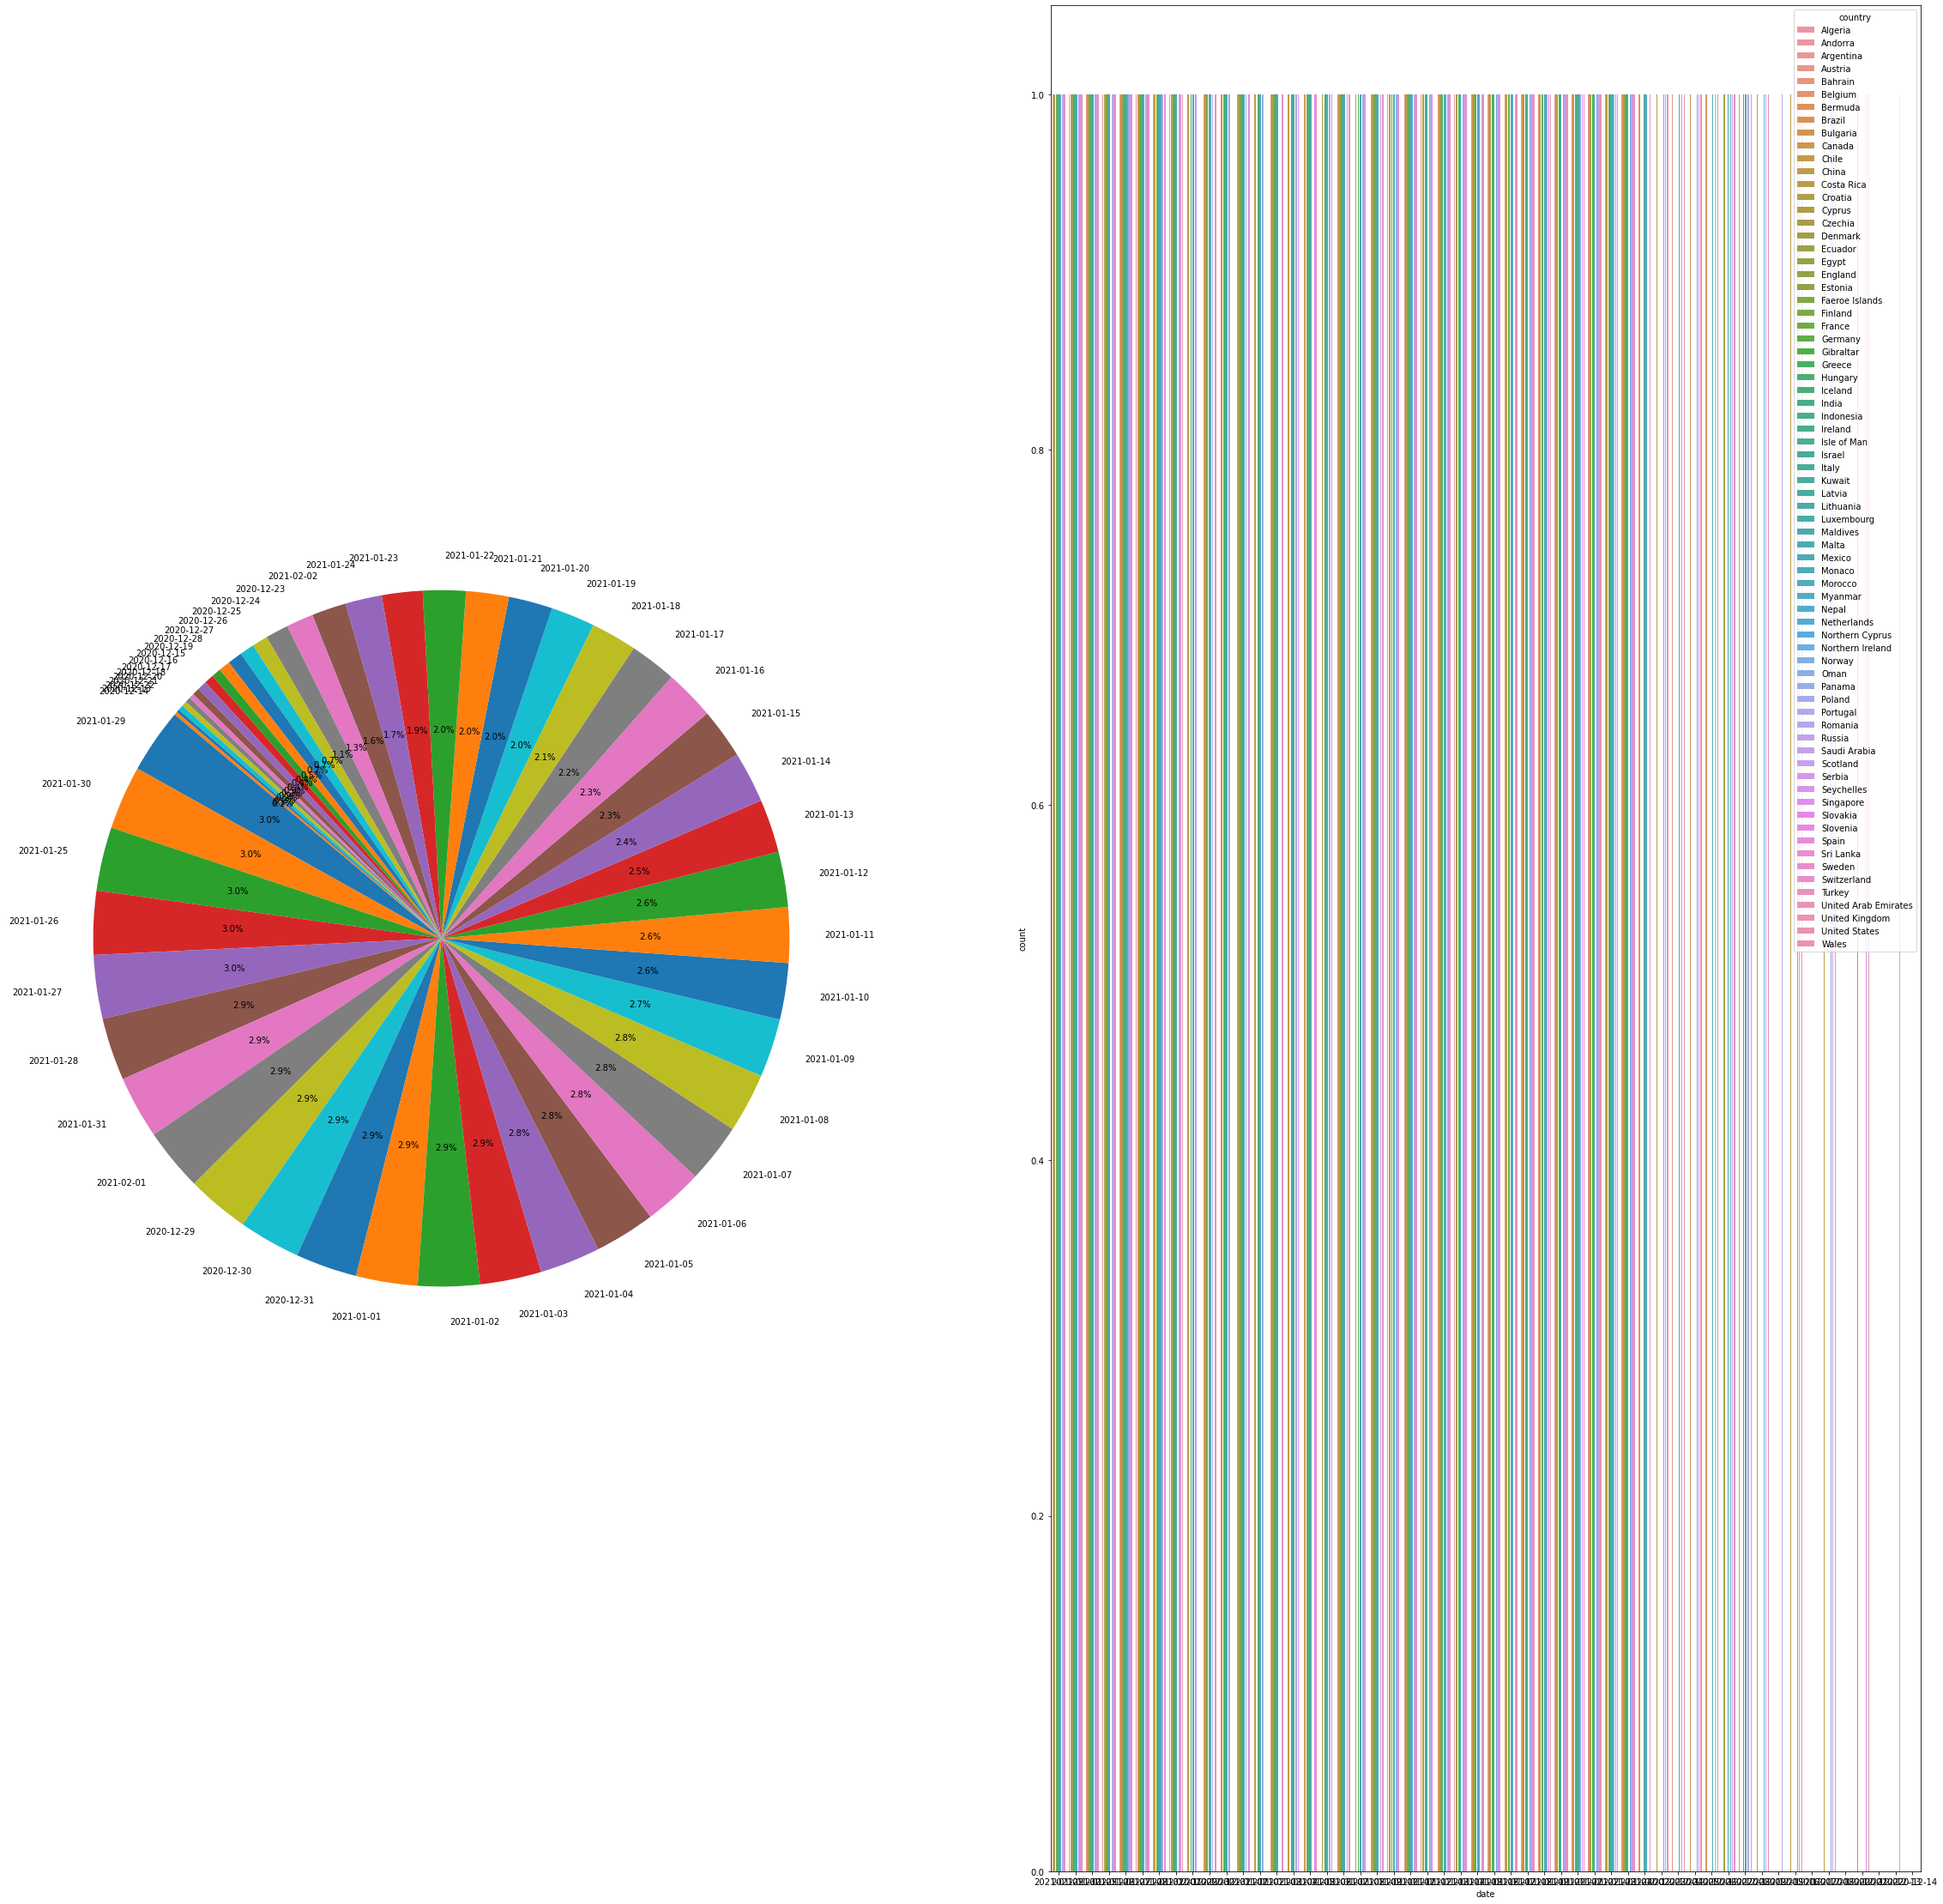

In [127]:
plt.figure(figsize=(40,40))

plt.subplot(1,2,1)
plt.pie(df['date'].value_counts(), labels=df['date'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['date'], hue=df['country'])
plt.show()


# Vaccines

- Creating pie chart and bar chart based on type of Vaccine(s) being utilised

- This database is dominated with Sputnik V with 47% from Russia, this is very much supported from the news that Russia has taken the leap to vaccinate the people without finishing the third human trials, yet begin the vaccinations of their people and that's why the utilisation of Sputnik V vaccine is the highest

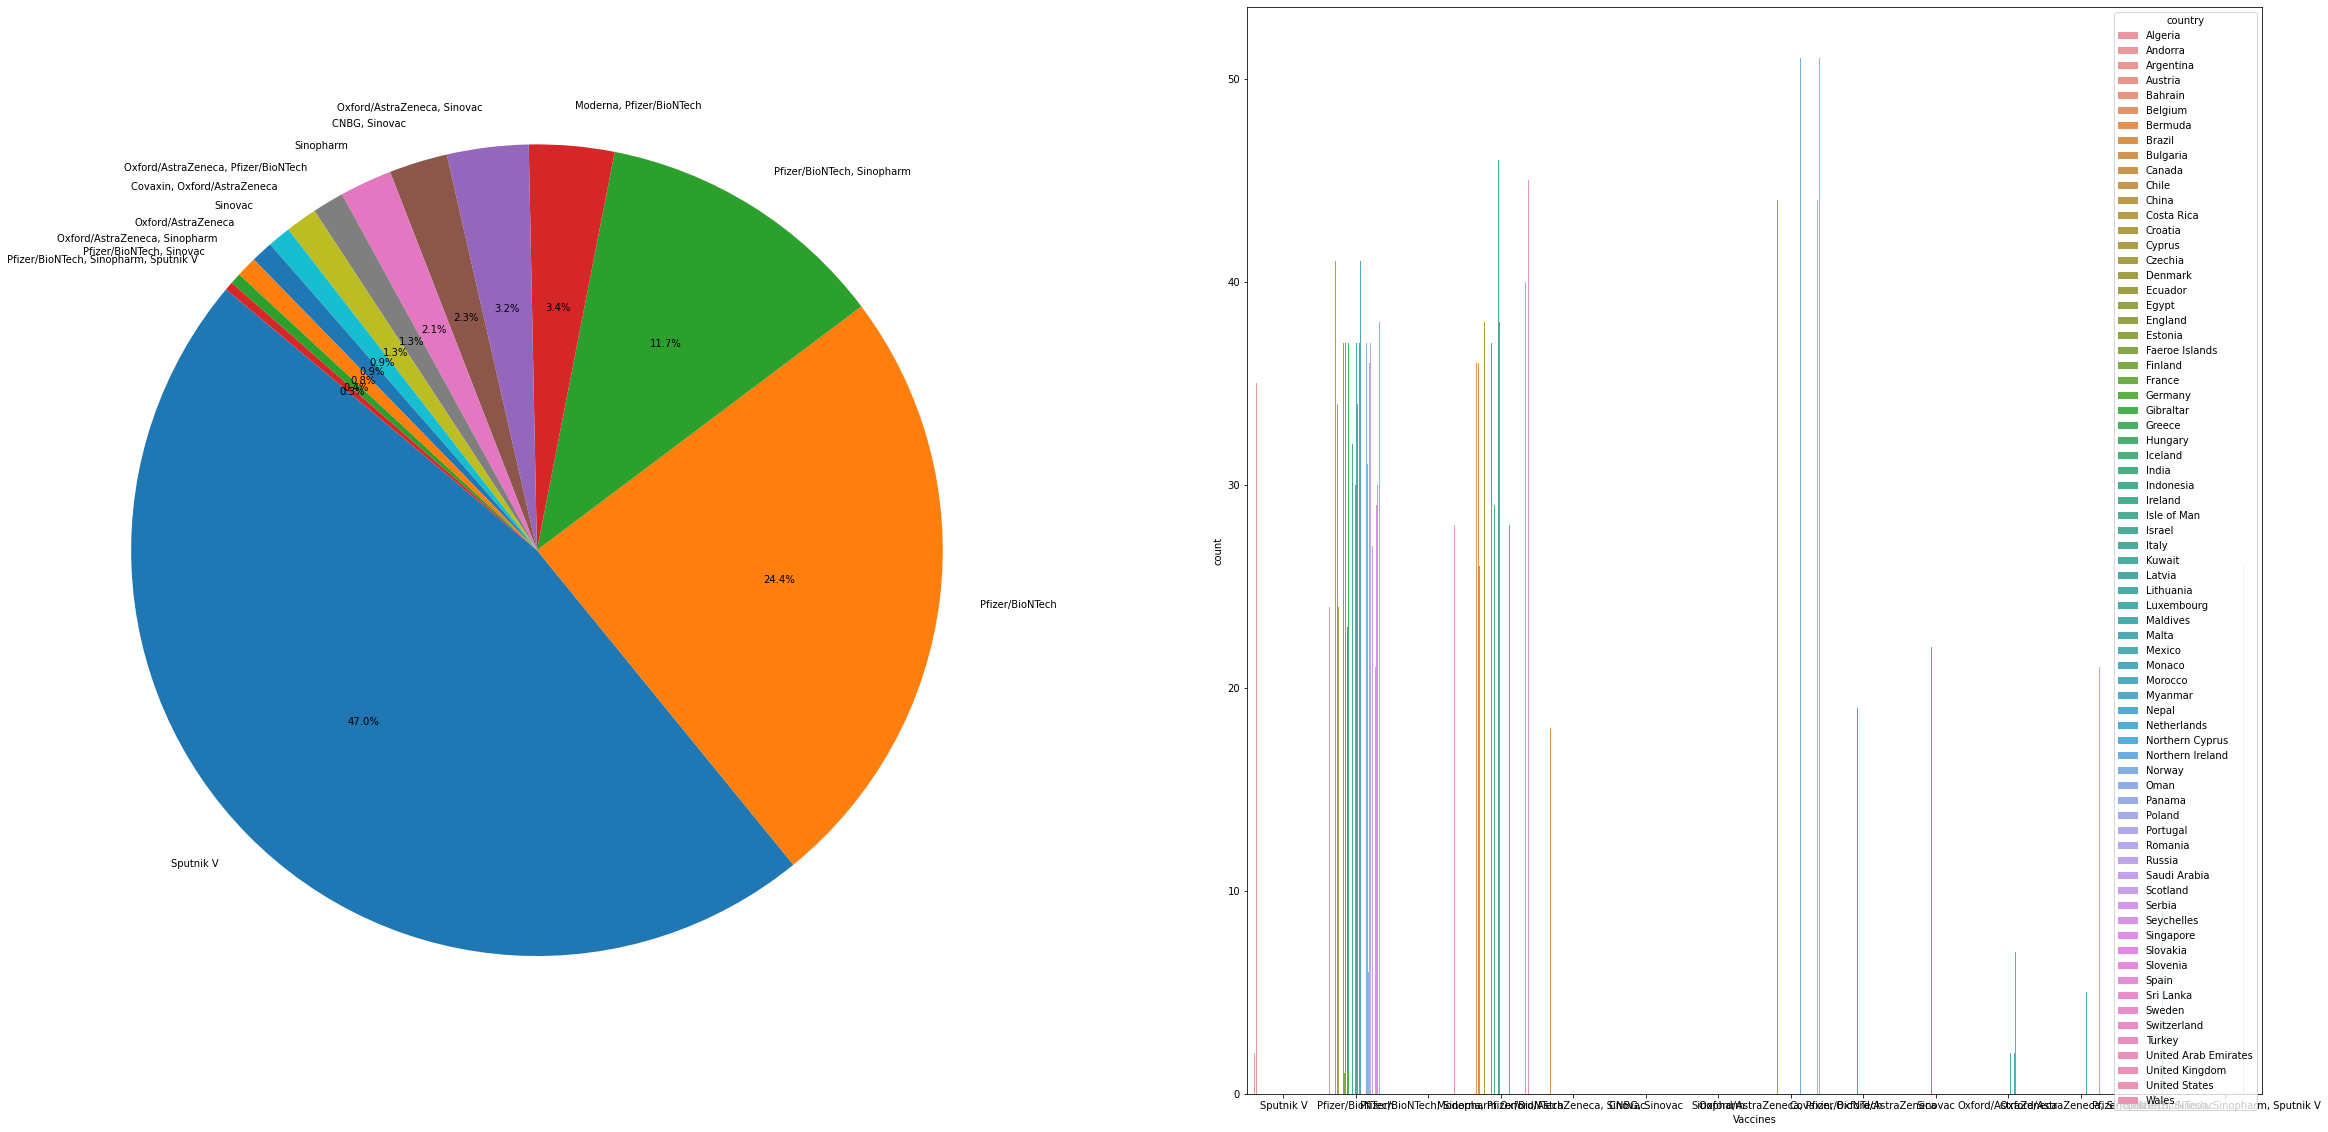

In [128]:
plt.figure(figsize=(40,20))

plt.subplot(1,2,1)
plt.pie(df['Vaccines'].value_counts(), labels=df['Vaccines'].unique(), autopct='%1.1f%%',startangle=140)

plt.subplot(1,2,2)
sns.countplot(df['Vaccines'], hue=df['country'])
plt.show()



## Total Vaccinations

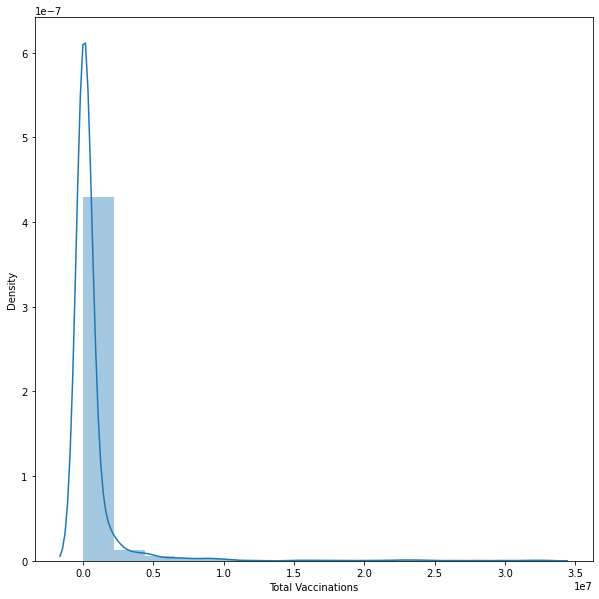

In [129]:
plt.figure(figsize=(10,10))
sns.distplot(df['Total Vaccinations'], bins=15)
plt.show()

## Daily Vaccinations

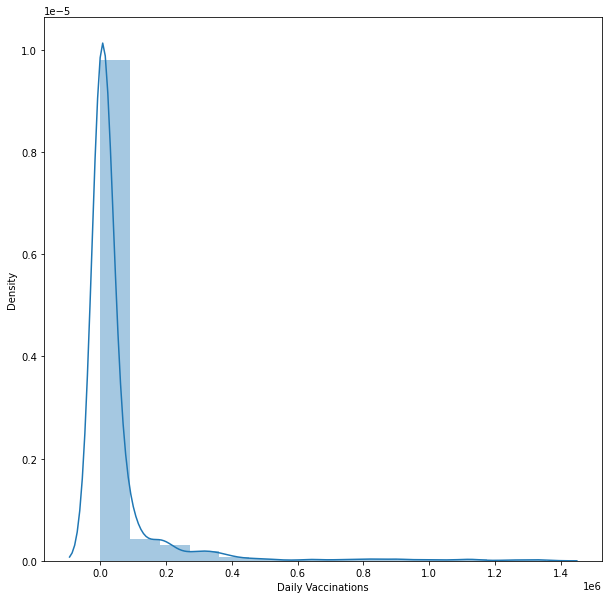

In [140]:
plt.figure(figsize=(10,10))
sns.distplot(df['Daily Vaccinations'], bins=15)
plt.show()

## People Vaccinated per 100 people

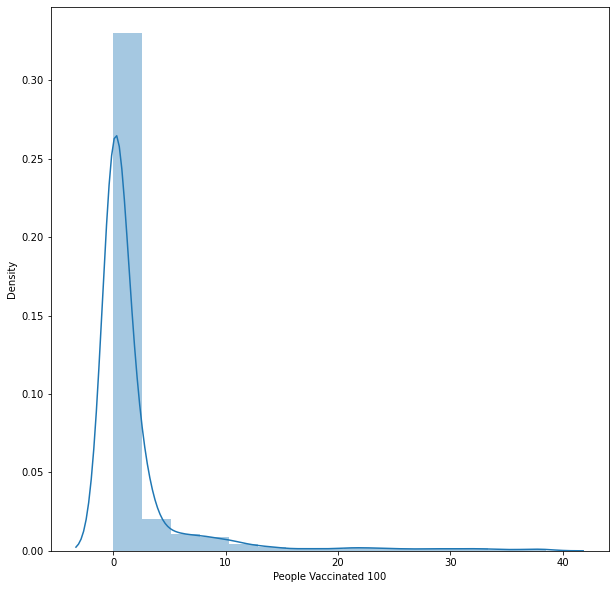

In [131]:
plt.figure(figsize=(10,10))
sns.distplot(df['People Vaccinated 100'], bins=15)
plt.show()

## Daily Vaccination per 1,000,000 People

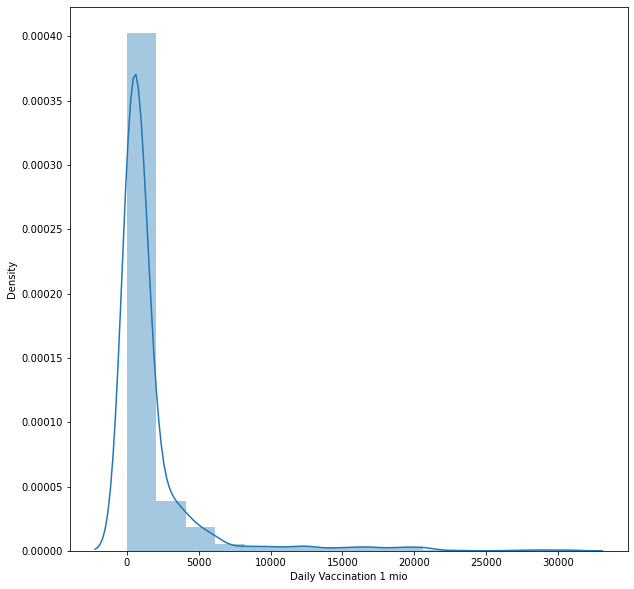

In [132]:
plt.figure(figsize=(10,10))
sns.distplot(df['Daily Vaccination 1 mio'], bins=15)
plt.show()

**Vaccinations Progress Summary**
    - Due to unequity of vaccines distribution, some can get their people vaccinated but the majority is still 0 people.
    - The data is raw, this means there is still a chance wether a country does not report their vaccinations progress transparently or not, but it is safe to conclude the world still needs to work together to simply end this horrible plague because we are in this together and none will be safe until to the edge of the world get the vaccines.


- Categorize the People Vaccinated per 100 people to simplify analysis

In [141]:
bins = [-1,0,10,20,30,40]
labels = ['Very Bad','Bad', 'Okay', 'Good', 'Great']
df['People Vaccinated 100'] = pd.cut(df['People Vaccinated 100'], bins=bins, labels=labels, right=False)
df.sample(20)

,country,date,Total Vaccinations,Daily Vaccinations,People Vaccinated 100,Daily Vaccination 1 mio,Vaccines
847,India,2021-01-29,NaN,301348.0,Bad,218.0,"Covaxin, Oxford/AstraZeneca"
450,Czechia,2021-01-18,NaN,10662.0,Bad,996.0,"Moderna, Pfizer/BioNTech"
907,Isle of Man,2021-01-22,NaN,90.0,Bad,1058.0,Pfizer/BioNTech
896,Ireland,2021-01-22,NaN,6686.0,Bad,1354.0,Pfizer/BioNTech
1139,Luxembourg,2021-01-30,NaN,622.0,Bad,994.0,Pfizer/BioNTech
1822,Sweden,2021-01-21,NaN,11514.0,Bad,1140.0,Pfizer/BioNTech
322,China,2021-01-24,NaN,940163.0,Bad,653.0,"CNBG, Sinovac"
556,England,2021-01-27,NaN,311182.0,Okay,5528.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
164,Brazil,2021-01-19,NaN,3823.0,Bad,18.0,"Oxford/AstraZeneca, Sinovac"
898,Ireland,2021-01-24,NaN,7000.0,Bad,1418.0,Pfizer/BioNTech


- Categorize the Daily Vaccination per 1 mio  people to simplify analysis

In [142]:
bins = [-1,0,1000,5000,10000,20000]
labels = ['Very Bad','Bad', 'Okay', 'Good', 'Great']
df['Daily Vaccination 1 mio'] = pd.cut(df['Daily Vaccination 1 mio'], bins=bins, labels=labels, right=False)
df.sample(20)

,country,date,Total Vaccinations,Daily Vaccinations,People Vaccinated 100,Daily Vaccination 1 mio,Vaccines
1343,Northern Ireland,2021-02-01,NaN,10314.0,Okay,Good,"Oxford/AstraZeneca, Pfizer/BioNTech"
237,Canada,2021-01-30,NaN,25822.0,Bad,Bad,"Moderna, Pfizer/BioNTech"
1845,Switzerland,2021-01-02,NaN,3000.0,Bad,Bad,"Moderna, Pfizer/BioNTech"
2058,Wales,2021-01-27,NaN,20845.0,Okay,Good,"Oxford/AstraZeneca, Pfizer/BioNTech"
1214,Mexico,2021-01-26,NaN,22028.0,Bad,Bad,Pfizer/BioNTech
1287,Northern Cyprus,2021-01-17,NaN,994.0,Bad,Okay,"Pfizer/BioNTech, Sinovac"
1165,Malta,2021-01-18,NaN,1162.0,Bad,Okay,Pfizer/BioNTech
1497,Romania,2021-01-04,NaN,3349.0,Bad,Bad,Pfizer/BioNTech
1934,United Kingdom,2020-12-30,NaN,50753.0,Bad,Bad,"Oxford/AstraZeneca, Pfizer/BioNTech"
1570,Saudi Arabia,2021-01-19,NaN,16240.0,Bad,Bad,Pfizer/BioNTech


- The score of the current vaccinations count (per 100 people)

In [143]:
df['People Vaccinated 100'].value_counts()

Bad         1956
Okay          55
Good          32
Great         21
Very Bad       0
Name: People Vaccinated 100, dtype: int64

- The score of the current vaccinations count (per 1 mio people)

In [144]:
df['Daily Vaccination 1 mio'].value_counts()

Bad         1280
Okay         637
Good          74
Great         58
Very Bad       0
Name: Daily Vaccination 1 mio, dtype: int64

- Creating countplot to see the distribution through categories

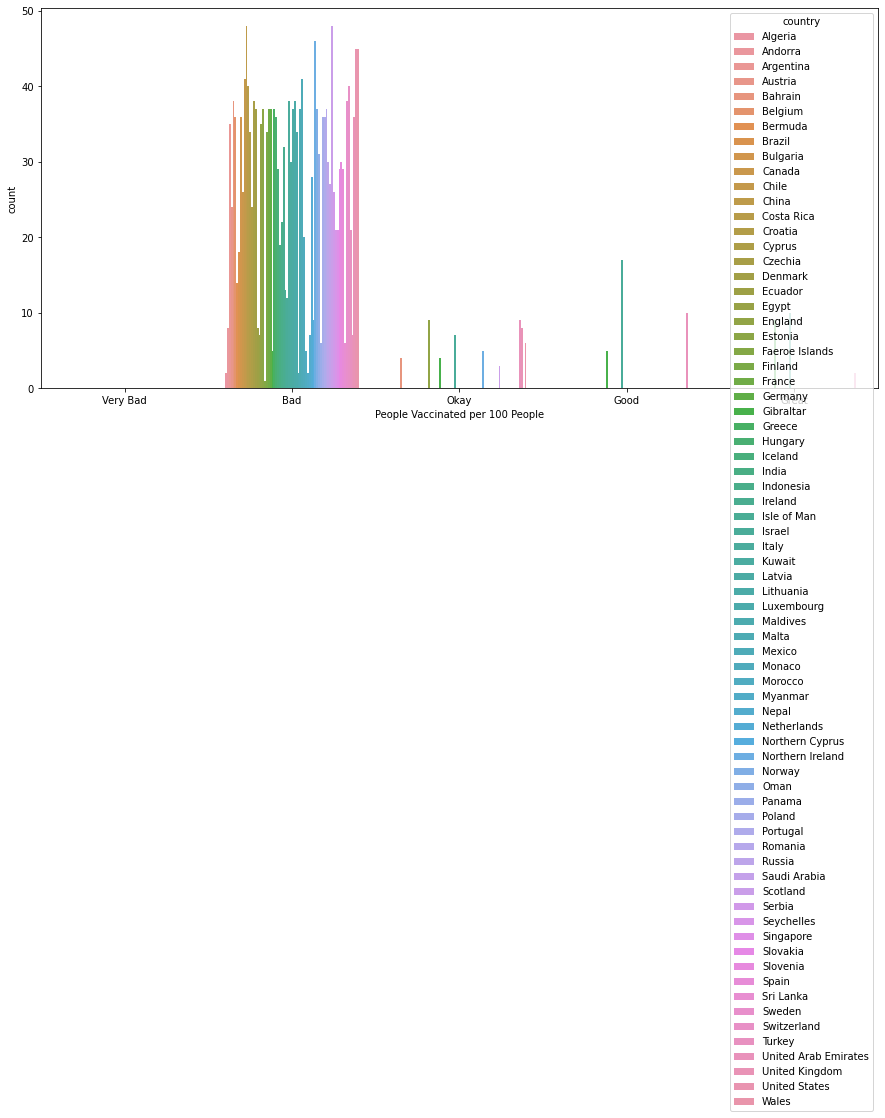

In [145]:
plt.figure(figsize=(15,7))
sns.countplot(df['People Vaccinated 100'], hue=df['country'])
plt.xlabel('People Vaccinated per 100 People')
plt.show()

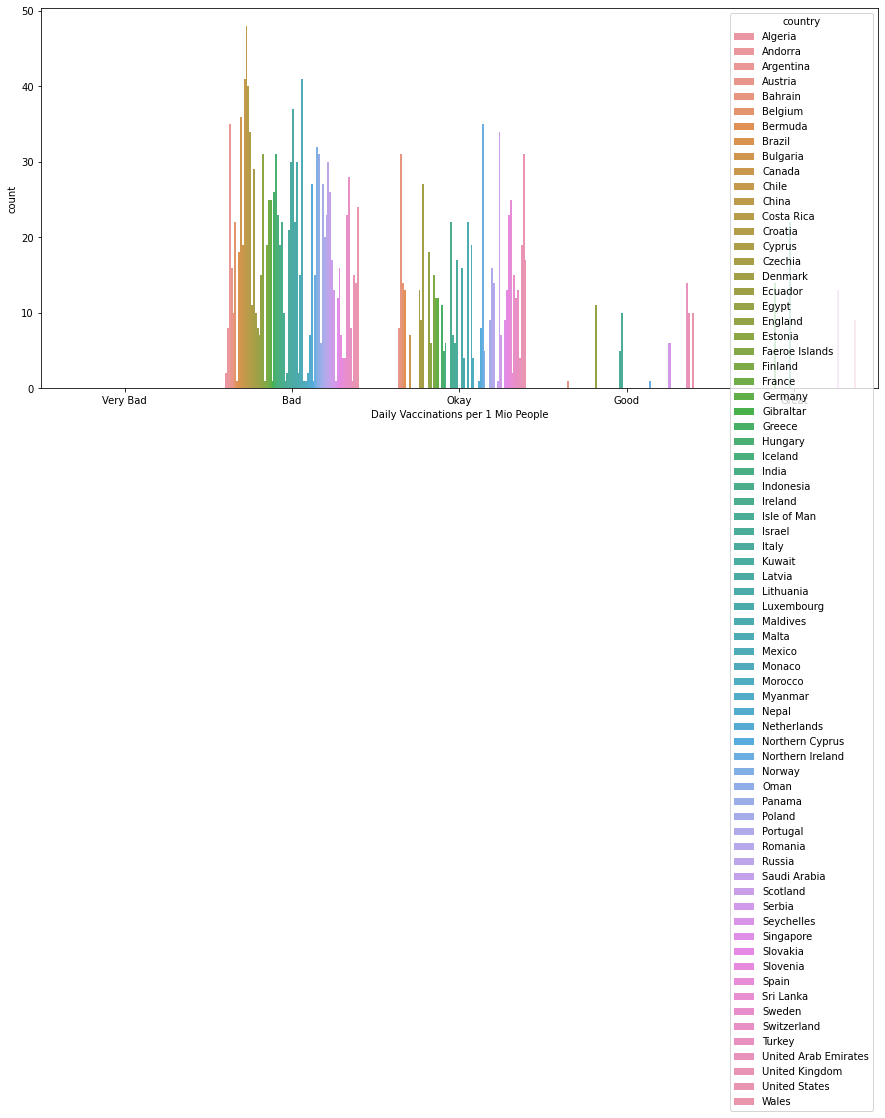

In [146]:
plt.figure(figsize=(15,7))
sns.countplot(df['Daily Vaccination 1 mio'], hue=df['country'])
plt.xlabel('Daily Vaccinations per 1 Mio People')
plt.show()

- How Country affect People Vaccinated per 100 value

In [152]:
pd.crosstab(df['People Vaccinated 100'], df['country'], normalize='index').round(4)*100

country,Algeria,Andorra,Argentina,Austria,Bahrain,Belgium,Bermuda,Brazil,Bulgaria,Canada,...,Slovenia,Spain,Sri Lanka,Sweden,Switzerland,Turkey,United Arab Emirates,United Kingdom,United States,Wales
People Vaccinated 100,,,,,,,,,,,,,,,,,,,,,
0.00,0.2,0.59,2.26,0.0,0.49,0.39,1.38,0.29,0.49,1.97,...,0.0,0.79,0.59,3.05,3.93,2.06,0.49,1.77,1.38,2.56
0.01,0.0,0.00,0.00,0.0,0.00,20.00,0.00,10.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.02,0.0,0.00,0.00,0.0,0.00,11.11,0.00,0.00,11.11,11.11,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.03,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.04,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36.60,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37.40,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
38.19,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- How Country affect People Vaccinated per 1 mio value

In [156]:
pd.crosstab(df['Daily Vaccination 1 mio'], df['country'], normalize='index').round(4)*100

country,Algeria,Andorra,Argentina,Austria,Bahrain,Belgium,Bermuda,Brazil,Bulgaria,Canada,...,Slovenia,Spain,Sri Lanka,Sweden,Switzerland,Turkey,United Arab Emirates,United Kingdom,United States,Wales
Daily Vaccination 1 mio,,,,,,,,,,,,,,,,,,,,,
0.0,1.3,1.3,1.3,1.3,1.3,2.6,1.3,1.30,1.3,6.49,...,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3
1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
